In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

np.random.seed(0)
n = 10000
mu = 1.
sigma = 5.

sample = np.random.normal(mu, sigma, n)

# Доверительные интервалы

Рассмотрим для нормального распределения.

## 1. НЕизвестное мат ожидание, известная дисперсия.

Генеральная совокупность имеет нормальное распределение $\xi$ ~ $N(\theta, \sigma^{2})$.

Выберем в качестве оценки мат ожидания выборочное среднее: $\overline{x} = \frac{1}{n}\sum_{i}^{n}x_{i}$.
Определеим распределение выборочного среднего:
1. Математическое ожидание. 
\begin{equation*}
    E\overline{x}=E(\frac{1}{n}\sum_{i}^{n}x_{i})=\frac{1}{n}\sum_{i}^{n}E(x_{i})=\frac{1}{n}n\theta=\theta.
\end{equation*}
2. Дисперсия. 
\begin{equation*}
    D\overline{x}=D(\frac{1}{n}\sum_{i}^{n}x_{i})=\frac{1}{n^{2}}\sum_{i}^{n}D(x_{i})=\frac{1}{n^{2}}n\sigma^{2}=\frac{1}{n}\sigma^{2}
\end{equation*}

Таким образом, выборочное среденее имеет Нормальное распределение $\overline{x}$~$N(\theta, \frac{1}{n}\sigma^{2})$.

Отнормируем полученное распределние к стандратному нормальному распределению, т.е. другими словами мы построим статистику:

\begin{equation*}
    S=\frac{\overline{x}-mu}{\sigma\sqrt n},
\end{equation*}
у которой можно опредлить квантили соответствующие уровню доверия $\alpha$. 
Таким образом, мы получим:
\begin{equation*}
    P\Big(u_{\alpha/2} < \frac{\overline{x}-\theta}{\sigma\sqrt n} < u_{1-\alpha/2}\Big)=1-\alpha \rightarrow 
    P\Big(\overline{x}-\frac{\sigma}{\sqrt n} u_{1-\alpha/2} < \theta < \overline{x}+\frac{\sigma}{\sqrt n} u_{\alpha/2}\Big)=1-\alpha.
\end{equation*}

Таким образом доверительний интервал для $\mu$ : 
\begin{equation*}
    \Big(\overline{x}-\frac{\sigma}{\sqrt n} u_{1-\alpha/2} \quad;\quad \overline{x}+\frac{\sigma}{\sqrt n} u_{\alpha/2}\Big).
\end{equation*}


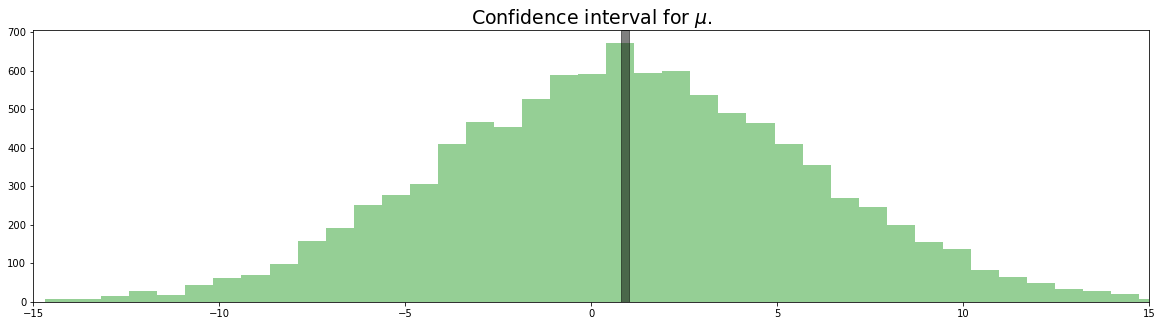

Interval = [0.810 ; 1.006]. Real value: 1.0


In [148]:
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(sample, 50, color = 'C2', alpha=0.5)

def confidence_interval_mu(sample, alpha, sigma):
    x_ = np.mean(sample)
    n = float(sample.shape[0])
    u_l = scipy.stats.norm.ppf(alpha/2.)
    u_r = scipy.stats.norm.ppf(1.-alpha/2.)
    
    left  = x_ - sigma * u_r / np.sqrt(n)
    right = x_ - sigma * u_l / np.sqrt(n)
    
    return left, right

l, r = confidence_interval_mu(sample, 0.05, sigma)
ax.axvspan(l, r, alpha=0.5, color='k')
ax.set_title(r'Confidence interval for $\mu$.', fontsize = 19)
ax.set_xlim([-15, 15])
plt.show()

print(r'Interval = [{:.3f} ; {:.3f}]. Real value: {}'.format(l, r, mu))

Рассмотрим для нормального распределения. (стр. 146 Лагутенко)

## 2. Известное мат ожидание, Неизвестная дисперсия.

Генеральная совокупность имеет нормальное распределение $\xi$ ~ $N(\mu, \theta^{2})$.

Следующая статистика имееет распределение $\chi^{2}$, т.к. по построению статистики видно что это сумма стандратно нормально распределенных случайных величин: 

\begin{equation*}
    S = \sum_{i}\Big(\frac{x_{i}-\mu}{\theta}\Big)^{2},
\end{equation*}

у которой можно опредлить квантили соответствующие уровню доверия $\alpha$. 
Таким образом, мы получим:
\begin{equation*}
    P\Big(u_{\alpha/2} < \sum_{i}\Big(\frac{x_{i}-\mu}{\theta}\Big)^{2} < u_{1-\alpha/2}\Big)=1-\alpha \rightarrow 
    P\Big( \frac{\sum_{i}^{n} (x_{i}-\mu)^{2}}{u_{1-\alpha/2}} < \theta^{2} < \frac{\sum_{i}^{n}(x_{i}-\mu)^{2}}{u_{\alpha/2}} \Big)=1-\alpha.
\end{equation*}

Таким образом доверительний интервал для $\sigma^{2}$ : 
\begin{equation*}
    \Big( \sqrt{\frac{\sum_{i}^{n} (x_{i}-\mu)^{2}}{u_{1-\alpha/2}}} \quad;\quad \sqrt{\frac{\sum_{i}^{n}(x_{i}-\mu)^{2}}{u_{\alpha/2}}} \Big)
\end{equation*}


243901.944347


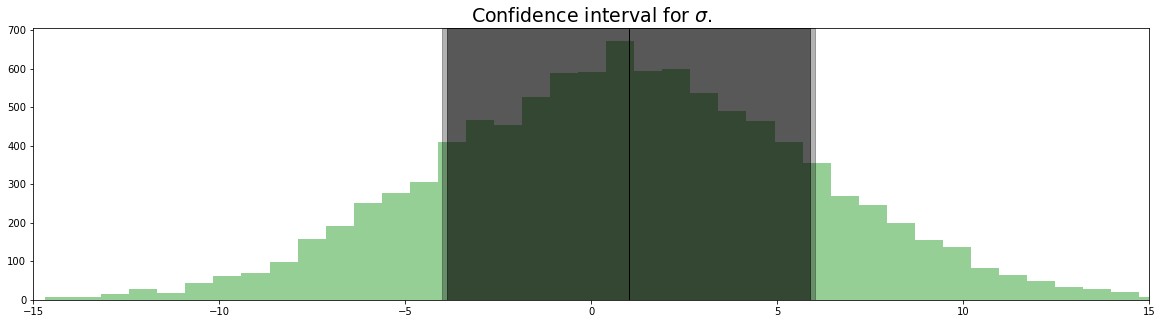

Interval = [4.871 ; 5.008]. Real value: 5.0


In [147]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.hist(sample, 50, color='C2', alpha=0.5)

def confidence_interval_sigma(sample, alpha, mu):
    n = sample.shape[0]
    u_l = scipy.stats.chi2.ppf(alpha/2., n)
    u_r = scipy.stats.chi2.ppf(1.-alpha/2., n)
    num = np.sum(map(lambda x: (x-mu)**2, sample))
    print(num)
    return np.sqrt(num / u_r), np.sqrt(num / u_l)

l, r = confidence_interval_sigma(sample, 0.05, mu)

ax.axvspan(mu - l, mu + l, alpha=0.5, color='k')
ax.axvspan(mu - r, mu + r, alpha=0.3, color='k')
ax.axvspan(mu, mu + 0.01, color='k')
ax.set_xlim([-15, 15])
ax.set_title(r'Confidence interval for $\sigma$.', fontsize = 19)
plt.show()

print(r'Interval = [{:.3f} ; {:.3f}]. Real value: {}'.format(l, r, sigma))

## 3. НЕизвестное мат. ожидание и НЕизвестная дисперсия.

Генеральная совокупность имеет нормальное распределение $\xi$ ~ $N(\theta_{1}, \theta_{2}^{2})$.

Запишем оценки для выборочного среднего и несмещенной оценки дисперсии:
- Выборочное среднее: $\overline(x)=\frac{1}{n}\sum_{i}^{n}x_{i}$.
- Несмещенная оценка дисперсии: $s^{2}=\frac{1}{n-1}\sum_{i}^{n}(x_{i}-\overline{x})^{2}$.

Используя эти оценки построим следующие статистики:

### 3.1 Оценка математического ожидания.

Построим статистику которая имеет распределение $t(n-1)$, т.е. распределение Стьюдента из двух статистик:
- Статистика $Y_{1}$ имеет стандартное нормальное распределение: $Y_{1}=\frac{\overline{x}-\theta_{1}}{\theta_{2}/\sqrt n}$ ~ $N(0, 1)$.
- Статистика $Y_{2}$ имеет $\chi^{2}(n-1)$ распределение: $Y_{2}=\frac{1}{\theta_{2}}s^{2}$ ~ $\chi^{2}(n-1)$.

Итоговая статистика имеет вид:
\begin{equation*}
    S = \frac{Y_{1}}{Y_{2}} = \frac{1}{s^{2}/\sqrt{n}}\Big( \overline{x}-\theta_{1} \Big),
\end{equation*}

У данной статистики можно опредлить квантили соответствующие уровню доверия $\alpha$. 

\begin{equation*}
    P\Big(t_{\alpha/2} < \frac{\overline{x}-\theta_{1}}{s^{2}/\sqrt{n}} < t_{1-\alpha/2}\Big)=1-\alpha \rightarrow
    P\Big( \overline{x}-\frac{s}{\sqrt{n}}t_{1-\alpha/2} < \theta_{1} < \overline{x}+\frac{s}{\sqrt{n}}t_{\alpha/2}\Big)=1-\alpha
\end{equation*}

Таким образом доверительний интервал для $\mu$ : 
\begin{equation*}
    \Big(\overline{x}-\frac{s}{\sqrt{n}}t_{1-\alpha/2} \quad;\quad \overline{x}+\frac{s}{\sqrt{n}}t_{\alpha/2}\Big)
\end{equation*}


### 3.2 Оценка дисперсии.

Построим статистику которая имеет распределение $\chi^{2}(n-1)$, т.к. одна степень свободы уходит на выборочное сренее, так этот член зависимый от выборки:

\begin{equation*}
    S = \frac{(n-1)s^{2}}{\sigma^{2}} = \sum_{i}^{n}\Big(\frac{x_{i}-\overline{x}}{\sigma}\Big)^{2} = \frac{\sum_{i}^{n}(x_{i}-\overline{x})^{2}}{\sigma^{2}},
\end{equation*}

У данной статистики можно опредлить квантили соответствующие уровню доверия $\alpha$. 

\begin{equation*}
    P\Big(u_{\alpha/2}<\frac{(n-1)s^{2}}{\sigma^{2}}<u_{1-\alpha/2}\Big)=1-\alpha \rightarrow P\Big(\frac{(n-1)s^{2}}{u_{1-\alpha/2}} < \sigma^{2} < \frac{(n-1)s^{2}}{u_{\alpha/2}} \Big)=1-\alpha,
\end{equation*}

Таким образом доверительний интервал для $\sigma^{2}$ : 
\begin{equation*}
    \Big( \sqrt{\frac{(n-1)s^{2}}{u_{1-\alpha/2}}} \quad;\quad \sqrt{\frac{(n-1)s^{2}}{u_{\alpha/2}}} \Big)
\end{equation*}


Interval = [0.811 ; 1.005]. Real value: 1.0


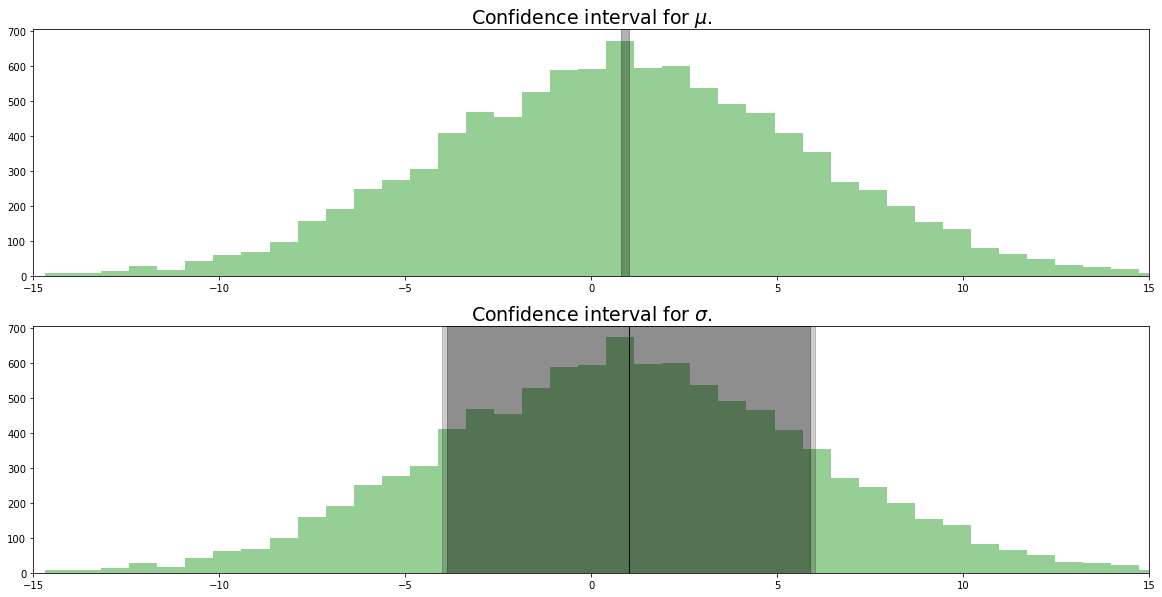

Interval = [4.871 ; 5.007]. Real value: 5.0


In [145]:
fig, ax = plt.subplots(2, figsize=(20, 10))
ax[0].hist(sample, 50, color='C2', alpha=0.5)
ax[1].hist(sample, 50, color='C2', alpha=0.5)


# Expected value confidence interval
def confidance_interval_mu(sample, alpha):
    n = float(sample.shape[0])
    t_l = scipy.stats.t.ppf(   alpha/2., n-1)
    t_r = scipy.stats.t.ppf(1.-alpha/2., n-1)
    
    x_ = np.mean(sample)
    s = np.sqrt(np.sum(map(lambda x: (x-x_)**2, sample))/(n-1.))
    
    return x_ - s * t_r / np.sqrt(n), x_ - s * t_l / np.sqrt(n)

l, r = confidance_interval_mu(sample, 0.05)
ax[0].axvspan(l, r, alpha=0.3, color='k')
ax[0].set_xlim([-15, 15])
ax[0].set_title(r'Confidence interval for $\mu$.', fontsize = 19)

print(r'Interval = [{:.3f} ; {:.3f}]. Real value: {}'.format(l, r, mu))

# Sigma confidence interval
def confidance_interval_sigma(sample, alpha):
    n = float(sample.shape[0])
    u_l = scipy.stats.chi2.ppf(alpha/2., n-1)
    u_r = scipy.stats.chi2.ppf(1.-alpha/2., n-1)
    
    x_ = np.mean(sample)
    s2 = np.sum(map(lambda x: (x-x_)**2, sample))/(n-1.)
    
    return np.sqrt((n-1.)*s2/u_r), np.sqrt((n-1.)*s2/u_l)


l, r = confidance_interval_sigma(sample, 0.05)

ax[1].axvspan(mu - l, mu + l, alpha=0.3, color='k')
ax[1].axvspan(mu - r, mu + r, alpha=0.2, color='k')
ax[1].axvspan(mu, mu + 0.01, color='k')
ax[1].set_xlim([-15, 15])
ax[1].set_title(r'Confidence interval for $\sigma$.', fontsize = 19)
plt.show()

print(r'Interval = [{:.3f} ; {:.3f}]. Real value: {}'.format(l, r, sigma))

Точность это $l=\frac{S^{+}-S^{-}}{2}$. И с ростом $n$ происходит сужение интервала.